#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import colorcet as cc
sns.set_style('whitegrid')
palette = sns.color_palette(cc.glasbey, n_colors=25)
# EDA Libraries

In [ ]:
import plotly.express as px
import plotly.subplots as sp
import plotly.colors as cl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
# visulaization Library

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import lightgbm as lgb
# ML Libraries

#Remove Warning

In [ ]:
import warnings
warnings.simplefilter("ignore")

#Reading the data

In [ ]:
df=pd.read_csv("/content/USA_cars_datasets.csv")
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


#Data exploration

In [ ]:
df.shape

(2499, 13)

In [ ]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


The minimum price is zero so we will clean this column next

In [ ]:
df.nunique()

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [ ]:
df.nunique()/len(df)

Unnamed: 0      1.000000
price           0.316126
brand           0.011204
model           0.050820
year            0.012005
title_status    0.000800
mileage         0.975990
color           0.019608
vin             0.998399
lot             0.998399
state           0.017607
country         0.000800
condition       0.018808
dtype: float64

the unique values in some columns are too much so we need to clean them

#Data cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

Looks like we do not have any duplicates or null values

In [ ]:
df=df.drop(['Unnamed: 0','vin','lot'],axis=1)

I will drop these columns because they are not useful

#EDA

##price column

In [ ]:
print(df['price'].unique())

[ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55000 16200 19000  5580 54000 16000 27000  7760 19600 20000
 18100 23000 13490 17800  6650 29100 21100 18600  4340 19300 12780 15800
 29400  4430 19400 15900 26400  4140 18300 17900  4640 24000 13200 18000
 14900 11500  9110  7350 24500  9300 39800 53500 15110 34000 26502  5990
 13600 23605 10780 13800 25201  7070  8700 18003  8530 23100 17000 34002
  6980 20802  9200 26500 24802 28500 47500 23500 23505 10940 32100 53000
  6830 26414  4160 19405  5690 25900 24005  5090 19500 32012  6800  4260
     0 31802  7210 28402 33300  6700  6440 19900 37000  4040 22300 31200
  4290 22800 19002 39000  6060 28800 40000  6140 21000 20105  6760 25800
  5470 24502  7900 27305 15290 25502  3800  1400 18402   175 24503 15840
 20500 21003  4200 17400 32001 15700 31009  3740  5

In [ ]:
df['price'].replace(0,df['price'].mean() ,inplace=True)

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print(upper_bound,lower_bound)

47688.75 -11333.25


In [ ]:
for i in df['price']:
    if(i>upper_bound or i<1000):
        df['price']=df['price'].replace(i,df['price'].mean())

In [ ]:
df['price'].describe()

count     2499.000000
mean     18433.520937
std       9790.316118
min       1000.000000
25%      11200.000000
50%      18000.000000
75%      24700.000000
max      47500.000000
Name: price, dtype: float64

I replaced the 0 price with the mean then i removed some outliers and replaced them with the mean

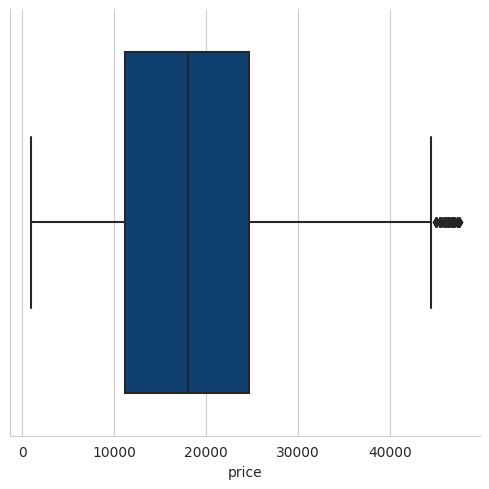

In [ ]:
g = sns.catplot(x='price',data=df,kind="box",palette="ocean")
plt.show()

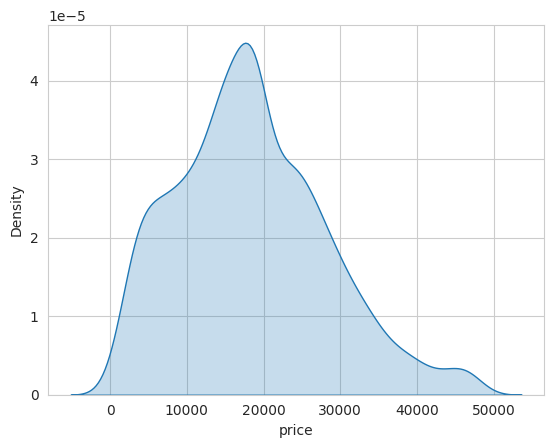

In [ ]:
g=sns.kdeplot(data = df, x = 'price', shade = True,palette="ocean")
plt.show()

Most cars price is near to 17347

##color column

In [ ]:
print(df['color'].unique())

['black' 'silver' 'blue' 'red' 'white' 'gray' 'orange' 'brown' 'no_color'
 'gold' 'charcoal' 'turquoise' 'beige' 'green' 'dark blue' 'maroon'
 'phantom black' 'yellow' 'color:' 'light blue' 'toreador red'
 'bright white clearcoat' 'billet silver metallic clearcoat'
 'black clearcoat' 'jazz blue pearlcoat' 'purple'
 'ruby red metallic tinted clearcoat' 'triple yellow tri-coat'
 'competition orange' 'off-white' 'shadow black' 'magnetic metallic'
 'ingot silver metallic' 'ruby red'
 'royal crimson metallic tinted clearcoat' 'kona blue metallic'
 'oxford white' 'lightning blue' 'ingot silver'
 'white platinum tri-coat metallic' 'guard' 'tuxedo black metallic' 'tan'
 'burgundy' 'super black' 'cayenne red' 'morningsky blue' 'pearl white'
 'glacier white']


In [ ]:
df['color'].value_counts()/len(df['color'])

white                                      0.282913
black                                      0.206483
gray                                       0.158063
silver                                     0.120048
red                                        0.076831
blue                                       0.060424
no_color                                   0.024410
green                                      0.009604
orange                                     0.008003
gold                                       0.007603
charcoal                                   0.007203
brown                                      0.006002
yellow                                     0.003601
magnetic metallic                          0.002401
shadow black                               0.002001
color:                                     0.002001
beige                                      0.002001
oxford white                               0.001601
ingot silver metallic                      0.001601
super black 

In [ ]:
threshold = len(df['color']) * 0.01
counts = df['color'].value_counts()
other = counts[counts < threshold].index.tolist()
df['color']=df['color'].replace(other,'other')

We have a lot of unique values so i will replace the values that their percentage under 1% with other

In [ ]:
df['color'].value_counts()

white       707
black       516
gray        395
silver      300
red         192
other       177
blue        151
no_color     61
Name: color, dtype: int64

In [ ]:
# Group data by color then counts every color
counts = df['color'].value_counts().reset_index()
counts.columns = ['color', 'count']

# Create a bar plot using plotly
fig=px.bar(counts,x='color', y = 'count',color='count', color_continuous_scale='tealgrn')
fig.show()

The most used colors are White,Black and Gray

In [ ]:
# Group data by color then calculate the mean price then sorting them
average_prices = df.groupby('color')['price'].mean().reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

In [ ]:
# Create a bar plot using plotly
fig = px.bar(average_prices, x ="color",y ='price',color='price', color_continuous_scale='tealgrn',title='Average Price for Each color')
fig.show()

Cars with no color and black ones have the highest prices among all of them

In [ ]:
fig = px.box(df,y="color",x='price')
fig.show()

##title status column

In [ ]:
df['title_status'].value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

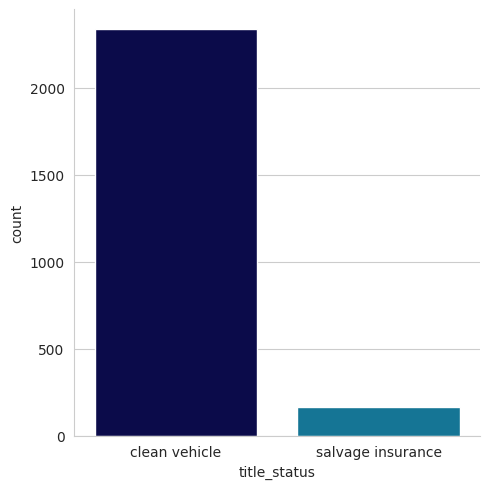

In [ ]:
g=sns.catplot(x="title_status",data=df,kind="count",palette="ocean",order = df['title_status'].value_counts().index, height=5, aspect=1)

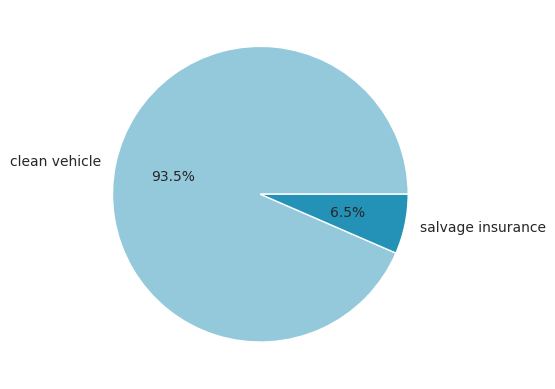

In [ ]:
plt.pie(df['title_status'].value_counts(), labels = ['clean vehicle','salvage insurance'], colors = sns.color_palette("ocean_r"), autopct = '%1.1f%%')
pass

93.5% of cars are clean vehicle

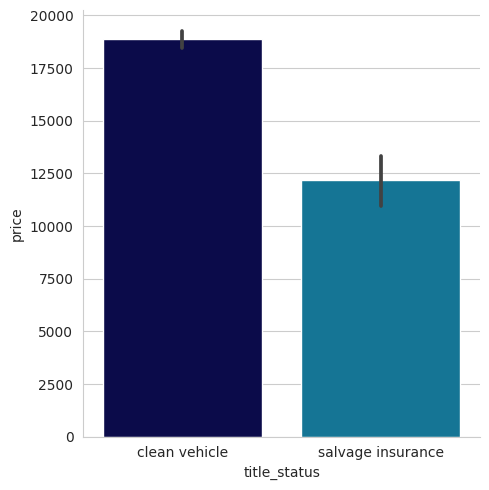

In [ ]:
g=sns.catplot(x="title_status",y='price',data=df,kind="bar",palette='ocean',order = df['title_status'].value_counts().index)

Clean vehicle has highest price nearby 18500

##model column

In [ ]:
print(df['model'].unique())

['cruiser' 'se' 'mpv' 'door' '1500' 'pk' 'malibu' 'coupe' 'wagon' 'forte'
 'encore' 'sorento' 'doors' 'chassis' 'q70' 'camaro' 'convertible' 'vans'
 'srw' 'compass' 'enclave' '300' 'cherokee' 'pacifica' 'x3' 'equinox'
 'challenger' 'm' 'colorado' 'focus' 'durango' 'escape' 'charger'
 'explorer' 'f-150' '3500' 'caravan' 'van' 'dart' '2500' 'esv' 'cutaway'
 'el' 'edge' 'series' 'flex' 'srx' 'cab' 'pickup' 'vehicl' 'trax' 'tahoe'
 'suburban' 'cargo' 'drw' 'fiesta' 'impala' 'soul' 'elantra' 'pioneer'
 'trail' 'traverse' 'country' 'sundance' 'road/street' 'nautilus' 'gx'
 'q5' 'gle' 'sportage' '5' 'sport' 'discovery' 'acadia' 'ghibli' 'glc'
 'e-class' 'truck' 'utility' 'limited' 'sl-class' 'cx-3' '2500hd' 'sonic'
 'corvette' 'mdx' 'xt5' 'fusion' 'mustang' 'passenger' 'volt' 'spark'
 'cruze' 'ld' 'journey' 'transit' 'ranger' 'taurus' 'max' 'energi'
 'expedition' 'bus' 'ecosport' 'f-750' 'd' 'dr' 'hybrid' 'suv' 'connect'
 'f-650' 'sentra' 'altima' 'frontier' 'rogue' 'maxima' 'versa' 'note'
 '

In [ ]:
df['model'].value_counts()/len(df['model'])

door        0.260504
f-150       0.087635
doors       0.059224
caravan     0.040816
mpv         0.034814
              ...   
sl-class    0.000400
cx-3        0.000400
2500hd      0.000400
mdx         0.000400
nvp         0.000400
Name: model, Length: 127, dtype: float64

In [ ]:
threshold = len(df['model']) * 0.01
counts = df['model'].value_counts()
other = counts[counts < threshold].index.tolist()
df['model']=df['model'].replace(other,'other')

We have a lot of unique values so i will replace the values that their percentage under 1% with other

In [ ]:
# Group data by model then counts every model
counts = df['model'].value_counts().reset_index()
counts.columns = ['model', 'count']

# Create a bar plot using plotly
fig=px.bar(counts,x='model', y = 'count',color='count', color_continuous_scale='tealgrn')
fig.show()

The door model seems to be the most popular of all models

In [ ]:
# Group data by model then calculate the mean price then sorting them
average_prices = df.groupby('model')['price'].mean().reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

In [ ]:
# Create a bar plot using plotly
fig = px.bar(average_prices, x ="model",y ='price',color='price', color_continuous_scale='tealgrn',title='Average Price for Each model')
fig.show()

Max and Expedition models seem to have the highest prices of all models

##brand column

In [ ]:
print(df['brand'].unique())

['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram']


In [ ]:
df['brand'].value_counts()/len(df['brand'])

ford               0.494198
dodge              0.172869
nissan             0.124850
chevrolet          0.118848
gmc                0.016807
jeep               0.012005
chrysler           0.007203
bmw                0.006803
hyundai            0.006002
kia                0.005202
buick              0.005202
infiniti           0.004802
honda              0.004802
cadillac           0.004002
mercedes-benz      0.004002
heartland          0.002001
land               0.001601
peterbilt          0.001601
audi               0.001601
acura              0.001200
lincoln            0.000800
lexus              0.000800
mazda              0.000800
maserati           0.000400
toyota             0.000400
harley-davidson    0.000400
jaguar             0.000400
ram                0.000400
Name: brand, dtype: float64

In [ ]:
threshold = len(df['brand']) * 0.01
counts = df['brand'].value_counts()
other = counts[counts < threshold].index.tolist()
df['brand']=df['brand'].replace(other,'other')

We have a lot of unique values so i will replace the values that their percentage under 1% with other

In [ ]:
# Group data by Brand then counts every brand
counts = df['brand'].value_counts().reset_index()
counts.columns = ['brand', 'count']

# Create a bar plot using plotly
fig=px.bar(counts,x='brand', y = 'count',color='count', color_continuous_scale='tealgrn',title='Most popular brands')
fig.show()

Ford brand seems to be the most popular of all brands

In [ ]:
# Group data by brand then calculate the mean price then sorting them
average_prices = df.groupby('brand')['price'].mean().reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

In [ ]:
# Create a bar plot using plotly
fig = px.bar(average_prices, x ="brand",y ='price',color='price', color_continuous_scale='tealgrn',title='Average Price for Each Brand')
fig.show()

Ford and Chevrolet brands seem to have the highest prices of all brands

In [ ]:
filtered_df = df.groupby(['brand', 'model']).apply(lambda x: x.nsmallest(1, 'price')).reset_index(drop=True)

fig = px.scatter(filtered_df, x='brand', y='price', color='model',title="Least Prices For Each model In Every brand")
fig.show()

In [ ]:
groupby_df = (df.groupby(['brand','model'])['model'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('brand', keep='first'))
groupby_df

,brand,model,count
0,ford,door,363
2,chevrolet,other,143
4,dodge,caravan,102
7,nissan,other,87
9,other,other,67
32,gmc,door,23
37,jeep,mpv,17


This table shows the most used model by each brand

##country column

In [ ]:
df['country'].value_counts()

 usa       2492
 canada       7
Name: country, dtype: int64

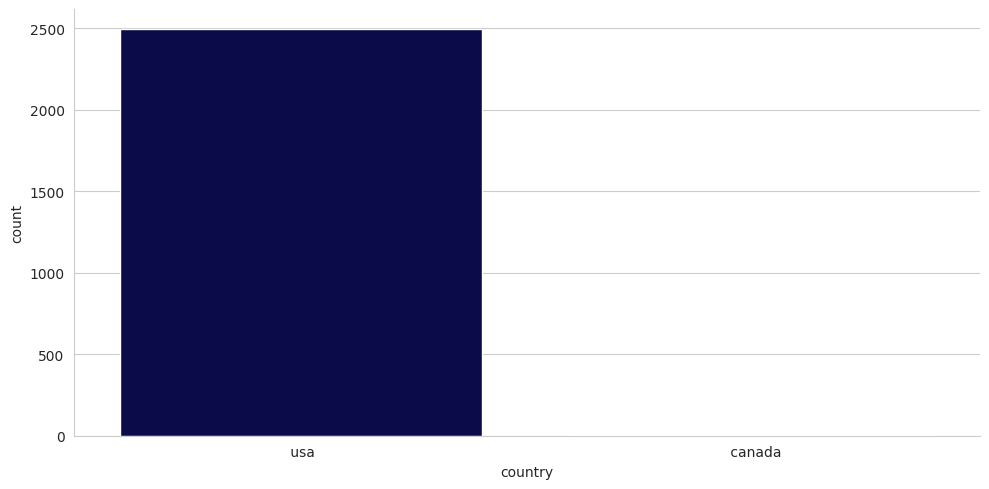

In [ ]:
g=sns.catplot(x="country",data=df,kind="count",palette="ocean",order = df['country'].value_counts().index, height=5, aspect=2)

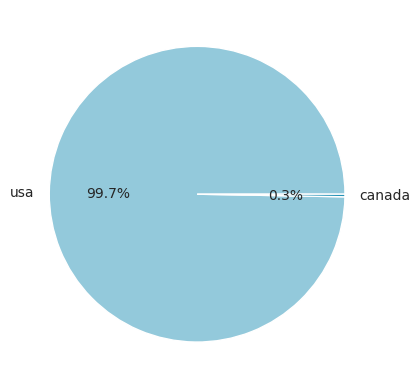

In [ ]:
plt.pie(df['country'].value_counts(), labels = ['usa','canada'], colors = sns.color_palette("ocean_r"), autopct = '%1.1f%%')
pass

The ratio between usa and canada is tiny so i will assume that all cars are from Usa and drop the column

In [ ]:
df=df.drop(['country'],axis=1)

##state column

In [ ]:
print(df['state'].unique())

['new jersey' 'tennessee' 'georgia' 'virginia' 'florida' 'texas'
 'california' 'north carolina' 'ohio' 'new york' 'pennsylvania'
 'south carolina' 'michigan' 'washington' 'arizona' 'utah' 'kentucky'
 'massachusetts' 'nebraska' 'ontario' 'missouri' 'minnesota' 'oklahoma'
 'connecticut' 'indiana' 'arkansas' 'kansas' 'wyoming' 'colorado'
 'illinois' 'wisconsin' 'mississippi' 'maryland' 'oregon' 'west virginia'
 'nevada' 'rhode island' 'louisiana' 'alabama' 'new mexico' 'idaho'
 'new hampshire' 'montana' 'vermont']


In [ ]:
df['state'].value_counts()/len(df['state'])

pennsylvania      0.119648
florida           0.098439
texas             0.085634
california        0.076030
michigan          0.067627
north carolina    0.058423
minnesota         0.047619
illinois          0.045218
wisconsin         0.037615
virginia          0.036014
new jersey        0.034814
nevada            0.034014
oklahoma          0.028411
south carolina    0.025610
new york          0.023209
georgia           0.020408
missouri          0.018407
arizona           0.013205
ohio              0.012405
massachusetts     0.010804
oregon            0.010804
tennessee         0.010404
connecticut       0.010004
mississippi       0.009604
colorado          0.008403
west virginia     0.008403
alabama           0.006803
washington        0.005602
indiana           0.005602
arkansas          0.004802
louisiana         0.004402
utah              0.004002
kentucky          0.003601
ontario           0.002801
kansas            0.001601
maryland          0.001601
nebraska          0.001601
n

In [ ]:
threshold = len(df['state']) * 0.01
counts = df['state'].value_counts()
other = counts[counts < threshold].index.tolist()
df['state']=df['state'].replace(other,'other')

We have a lot of unique values so i will replace the values that their percentage under 1% with other

In [ ]:
# Group data by state then counts every state
counts = df['state'].value_counts().reset_index()
counts.columns = ['state', 'count']

# Create a bar plot using plotly
fig=px.bar(counts,x='state', y = 'count',color='count', color_continuous_scale='tealgrn')
fig.show()

Pennsylvania and Florida are the states with the most available cars for purchase

In [ ]:
# Group data by state then calculate the mean price then sorting them
average_prices = df.groupby('state')['price'].mean().reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

In [ ]:
# Create a bar plot using plotly
fig = px.bar(average_prices, x ="state",y ='price',color='price', color_continuous_scale='tealgrn',title='Average Price for Each state')
fig.show()

Michigan and Nevada are the states with the highest prices for available cars

In [ ]:
filtered_df = df.groupby(['state', 'brand']).apply(lambda x: x.nsmallest(1, 'price')).reset_index(drop=True)

fig = px.scatter(filtered_df, x='state', y='price', color='brand',title="Least Prices For Each Brand In Every State")
fig.show()

In [ ]:
groupby_df = (df.groupby(['state','brand'])['brand'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('state', keep='first'))
groupby_df

,state,brand,count
0,pennsylvania,ford,191
1,texas,ford,135
2,michigan,ford,97
3,other,ford,86
4,florida,ford,83
6,california,ford,72
7,illinois,ford,68
9,north carolina,dodge,60
10,minnesota,nissan,59
11,virginia,ford,52


This table shows the most popular brand in each state

##mileage column

In [ ]:
print(df['mileage'].unique())

[274117. 190552.  39590. ...  34553.  32557.  31371.]


In [ ]:
q1 = df['mileage'].quantile(0.25)
q3 = df['mileage'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print(upper_bound,lower_bound)

126481.5 -41542.5


In [ ]:
for i in df['mileage']:
    if(i>upper_bound or i<lower_bound):
        df['mileage']=df['mileage'].replace(i,df['mileage'].mean())

i removed some outliers and replaced them with the mean

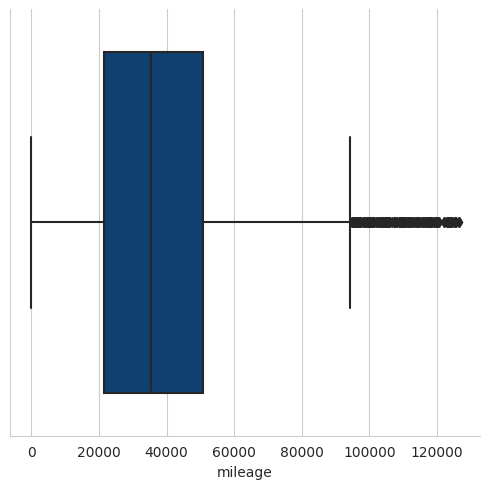

In [ ]:
g = sns.catplot(x='mileage',data=df,kind="box",palette="ocean")
plt.show()

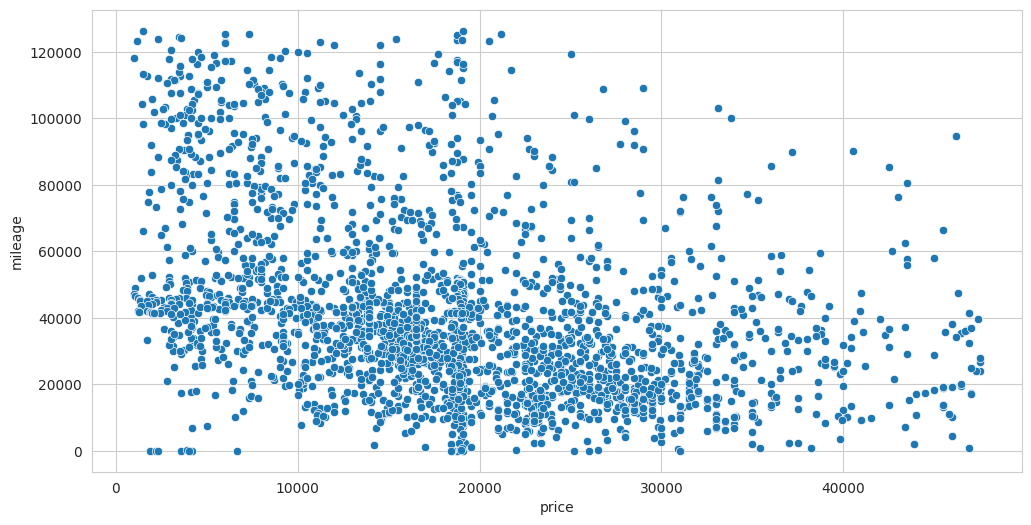

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='mileage', x="price",data=df)
plt.show()

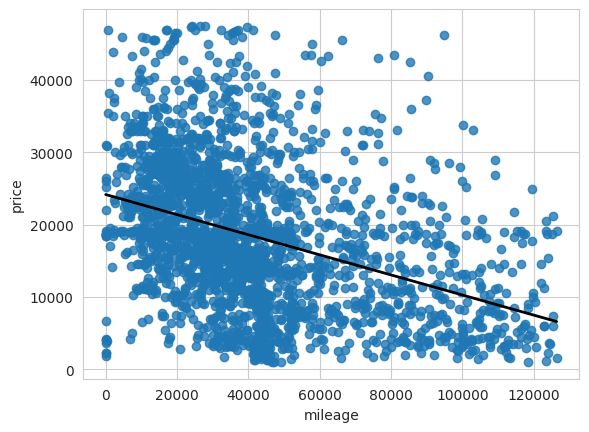

In [ ]:
sns.regplot(x='mileage',y="price",data=df,ci=None,line_kws={'lw':2,'color':'black'})
plt.show()

Cars with higher miles traveled seem to have lower prices

##year column

In [ ]:
print(df['year'].unique())

[2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]


In [ ]:
df['year'].value_counts()

2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: year, dtype: int64

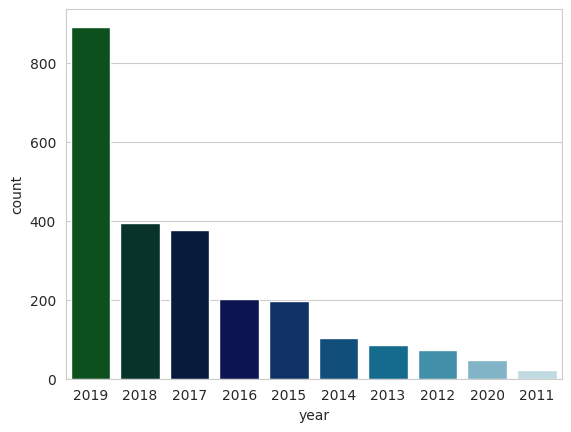

In [ ]:
top_10_years = df["year"].value_counts().head(10)
sns.countplot(x="year", data=df, order=top_10_years.index,palette="ocean")
plt.show()

2019 is the most common year in which cars were registered

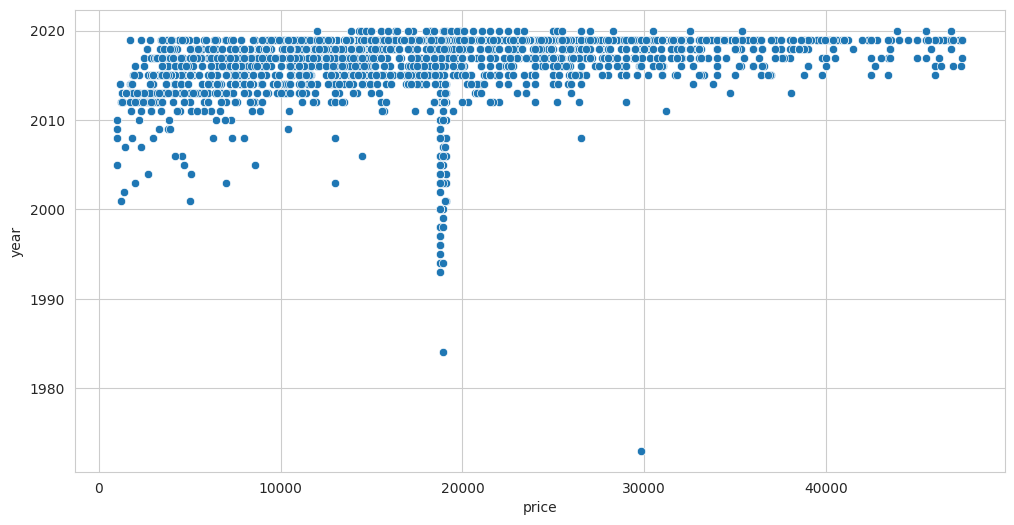

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='year', x="price",data=df)
plt.show()

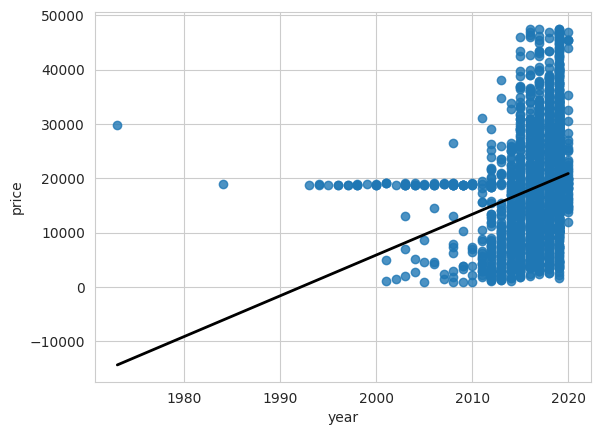

In [ ]:
sns.regplot(x='year',y="price",data=df,ci=None,line_kws={'lw':2,'color':'black'})
plt.show()

Car prices seem to be increasing over the years

##condition column

In [ ]:
df['value']= df['condition'] .str.split(' ').str[0]
df['days']= df['condition'] .str.split(' ').str[1]
def days_to_min(time):
    return int(time)*1440
def hours_to_min(time):
    return int(time)*60
data=pd.concat([df[df['days']=='days']['value'].apply(days_to_min),
           df[df['days']=='hours']['value'].apply(hours_to_min),
           df[df['days']=='minutes']['value'].astype(int)]).rename('minute',inplace=True)
df=pd.concat([df,data],axis=1)
df['minute'].fillna(-200,inplace=True)
df.drop(['condition','value','days'],axis=1,inplace=True)

This code converts the 'condition' column into minutes, creating a new 'minute' column that stores the equivalent time in minutes.

In [ ]:
df['minute'].value_counts()

 2880.0     832
 1260.0     492
 4320.0     137
 840.0      108
 1440.0     100
 11520.0     82
 1020.0      76
 1200.0      67
 12960.0     58
 1320.0      57
 8640.0      52
 1080.0      48
 1140.0      45
 10080.0     43
 15840.0     42
 960.0       36
 120.0       26
 14400.0     23
-200.0       20
 29.0        18
 5760.0      16
 300.0       16
 1380.0      16
 1.0         15
 360.0       12
 17280.0      8
 900.0        8
 34.0         7
 420.0        7
 7200.0       6
 21600.0      4
 60.0         3
 9.0          3
 48.0         2
 180.0        2
 47.0         2
 18720.0      1
 16.0         1
 53.0         1
 27.0         1
 30.0         1
 32.0         1
 28.0         1
 240.0        1
 720.0        1
 36.0         1
Name: minute, dtype: int64

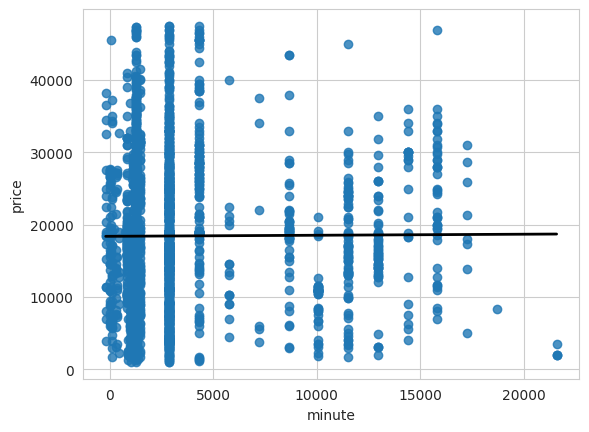

In [ ]:
sns.regplot(x='minute',y="price",data=df,ci=None,line_kws={'lw':2,'color':'black'})
plt.show()

#Preprocessing

In [ ]:
# These Features seem to have no effect so i will drop them
df.drop(['title_status','color'],axis=1,inplace=True)

In [ ]:
df

,price,brand,model,year,mileage,state,minute
0,6300.0,other,other,2008,52298.685474,new jersey,14400.0
1,2899.0,ford,other,2011,52209.922643,tennessee,8640.0
2,5350.0,dodge,mpv,2018,39590.000000,georgia,2880.0
3,25000.0,ford,door,2014,64146.000000,virginia,1320.0
4,27700.0,chevrolet,1500,2018,6654.000000,florida,1320.0
...,...,...,...,...,...,...,...
2494,7800.0,nissan,versa,2019,23609.000000,california,1440.0
2495,9200.0,nissan,versa,2018,34553.000000,florida,1260.0
2496,9200.0,nissan,versa,2018,31594.000000,florida,1260.0
2497,9200.0,nissan,versa,2018,32557.000000,florida,2880.0


In [ ]:
# Detecting outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [ ]:
# The Percentage of outliers in numerical features
for column in df.select_dtypes(include=[np.number]):
    outliers = detect_outliers_iqr(df[column])
    percentage_outliers = (sum(outliers) / len(df)) * 100
    print(f"Percentage of outliers in {column}: {percentage_outliers}%")


Percentage of outliers in price: 1.400560224089636%
Percentage of outliers in year: 5.042016806722689%
Percentage of outliers in mileage: 6.922769107643058%
Percentage of outliers in minute: 13.405362144857943%


<Axes: >

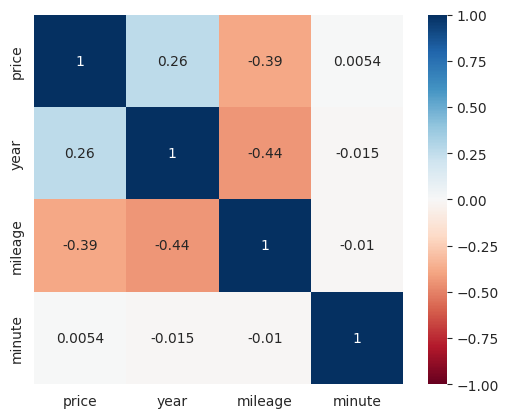

In [ ]:
# The Correlation between featuers
sns.heatmap(df.corr(), square = True, vmin = -1, annot = True,cmap = 'RdBu')

#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['brand'] = label_encoder.fit_transform(df['brand'])
df['model'] = label_encoder.fit_transform(df['model'])
df['state'] = label_encoder.fit_transform(df['state'])

#Rescalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_columns = ['year', 'mileage','minute','brand','model','state']
features_to_scale = df[selected_columns].values

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)
df[selected_columns] = scaled_features

# Train Test Split

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [ ]:
x=df.drop('price',axis=1)
y=df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Modelling

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)

knn_reg.fit(x_train, y_train)
y_pred = knn_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 5294.622613139056
Mean Squared Error (MSE): 60673090.367001995
Root Mean Squared Error (RMSE): 7789.293316277286
R-squared (R2) Score: 0.3747995622216834


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100)

model.fit(x_train, y_train)
y_pred_2 = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
rmse = mean_squared_error(y_test, y_pred_2, squared=False)
r2 = r2_score(y_test, y_pred_2)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 5410.470975152411
Mean Squared Error (MSE): 51000430.5655501
Root Mean Squared Error (RMSE): 7141.458574097458
R-squared (R2) Score: 0.47447062077118174


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)
y_pred_3 = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
rmse = mean_squared_error(y_test, y_pred_3, squared=False)
r2 = r2_score(y_test, y_pred_3)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 6844.445588839903
Mean Squared Error (MSE): 75190901.39304681
Root Mean Squared Error (RMSE): 8671.268730298169
R-squared (R2) Score: 0.22520207585394592


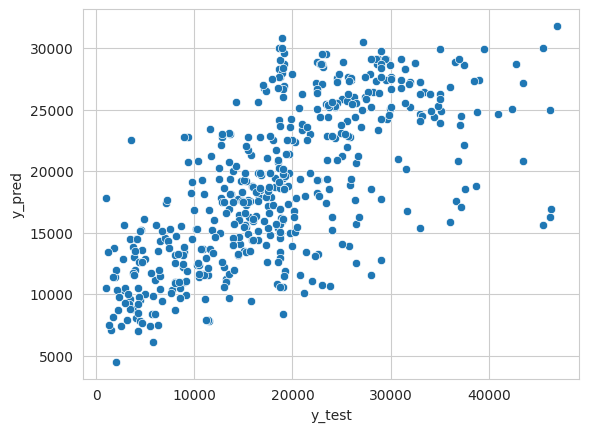

In [ ]:
data = {'y_test': y_test, 'y_pred': y_pred_2}
sns.scatterplot(x='y_test', y='y_pred', data=data)

plt.show()